# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Jefri Munandar
- **Email:** 	M322D4KY2535@bangkit.academy
- **ID Dicoding:** jefmunandar

## Menentukan Pertanyaan Bisnis

- Berapa total peminjaman sepeda pada tahun 2011?
- Berapa total peminjaman sepeda pada tahun 2012?
- Berapa total pengguna casual dan registered tahun 2011 dan 2012?
- Apakah ada perbedaan jumlah peminjaman sepeda berdasarkan jam kerja atau tidak?
- Apakah ada perbedaan jumlah peminjaman sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

def print_library_versions():
    print("Pandas version:", pd.__version__)
    print("NumPy version:", np.__version__)
    print("Seaborn version:", sns.__version__)
    print("Matplotlib version:", plt.matplotlib.__version__)
    print("SciPy version:", scipy.__version__)

print_library_versions()

Pandas version: 1.5.3
NumPy version: 1.25.2
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
SciPy version: 1.11.4


## Data Wrangling

### Gathering Data

In [358]:
day = pd.read_csv("/content/day.csv")
hour = pd.read_csv("/content/hour.csv")

In [359]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [360]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [361]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [362]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

In [363]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [364]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [365]:
day.duplicated().sum()

0

In [366]:
hour.duplicated().sum()

0

In [367]:
day_angka = day.drop(columns = "dteday")

def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

# Panggil fungsi detect_outliers untuk mendeteksi outlier dalam setiap kolom
outliers_count = detect_outliers(day_angka)

# Buat DataFrame baru dari dictionary outliers_count
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Nama Kolom', 'Jumlah Outlier'])

# Tampilkan DataFrame baru
print(outliers_df)

    Nama Kolom  Jumlah Outlier
0      instant               0
1       season               0
2           yr               0
3         mnth               0
4      holiday              21
5      weekday               0
6   workingday               0
7   weathersit               0
8         temp               0
9        atemp               0
10         hum               2
11   windspeed              13
12      casual              44
13  registered               0
14         cnt               0


In [368]:
hour_angka = hour.drop(columns = "dteday")

def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

# Panggil fungsi detect_outliers untuk mendeteksi outlier dalam setiap kolom
outliers_count = detect_outliers(hour_angka)

# Buat DataFrame baru dari dictionary outliers_count
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Nama Kolom', 'Jumlah Outlier'])

# Tampilkan DataFrame baru
print(outliers_df)

    Nama Kolom  Jumlah Outlier
0      instant               0
1       season               0
2           yr               0
3         mnth               0
4           hr               0
5      holiday             500
6      weekday               0
7   workingday               0
8   weathersit               3
9         temp               0
10       atemp               0
11         hum              22
12   windspeed             342
13      casual            1192
14  registered             680
15         cnt             505


### Cleaning Data

In [369]:
day['dteday'] = pd.to_datetime(day['dteday'], format='%Y-%m-%d')
hour['dteday'] = pd.to_datetime(hour['dteday'], format='%Y-%m-%d')

## Exploratory Data Analysis (EDA)

### Explore ...

In [383]:
merged_data = day.merge(hour, on='dteday', how='inner')


In [384]:
# Pisahkan data peminjaman sepeda berdasarkan hari libur dan hari kerja
hari_libur = day[day['holiday'] == 1]['cnt']
hari_kerja = day[day['holiday'] == 0]['cnt']

# Lakukan uji t-tes
t_statistic, p_value = ttest_ind(hari_libur, hari_kerja)
# Tentukan ambang alpha
alpha1 = 0.1


# Pisahkan data peminjaman sepeda berdasarkan musim
musim_1 = day[day['season'] == 1]['cnt']
musim_2 = day[day['season'] == 2]['cnt']
musim_3 = day[day['season'] == 3]['cnt']
musim_4 = day[day['season'] == 4]['cnt']

# Lakukan uji ANOVA
f_statistic, p_value = f_oneway(musim_1, musim_2, musim_3, musim_4)

# Tentukan ambang alpha
alpha2 = 0.05

# Pisahkan data peminjaman sepeda berdasarkan jam
jam_data = []
for i in range(24):
    jam_data.append(hour[hour['hr'] == i]['cnt'])

# Lakukan uji ANOVA
f_statistic, p_value = f_oneway(*jam_data)


# Tentukan ambang alpha
alpha3 = 0.05


## Visualization & Explanatory Analysis

### Pertanyaan 1
Berapa total peminjaman sepeda pada tahun 2011?

In [392]:
total_peminjaman_2011 = day[day['yr'] == 0]['cnt'].sum()
print(total_peminjaman_2011)

1243103


### Pertanyaan 2
Berapa total peminjaman sepeda pada tahun 2012?

In [394]:
total_peminjaman_2012 = day[day['yr'] == 1]['cnt'].sum()
print(total_peminjaman_2012)

2049576


### Pertanyaan 3
Berapa total pengguna casual dan registered tahun 2011 dan 2012?

In [400]:
total_casual_2011 = day[(day['yr'] == 0)]['casual'].sum()
total_casual_2012 = day[(day['yr'] == 1)]['casual'].sum()

total_registered_2011 = day[(day['yr'] == 0)]['registered'].sum()
total_registered_2012 = day[(day['yr'] == 1)]['registered'].sum()

print("Casual 2011",total_casual_2011)
print("Casual 2012",total_casual_2012)
print("\nRegistered 2011",total_registered_2011)
print("Registered 2012",total_registered_2012)

Casual 2011 247252
Casual 2012 372765

Registered 2011 995851
Registered 2012 1676811


### Pertanyaan 4:
Apakah ada perbedaan jumlah peminjaman sepeda berdasarkan jam kerja atau tidak?

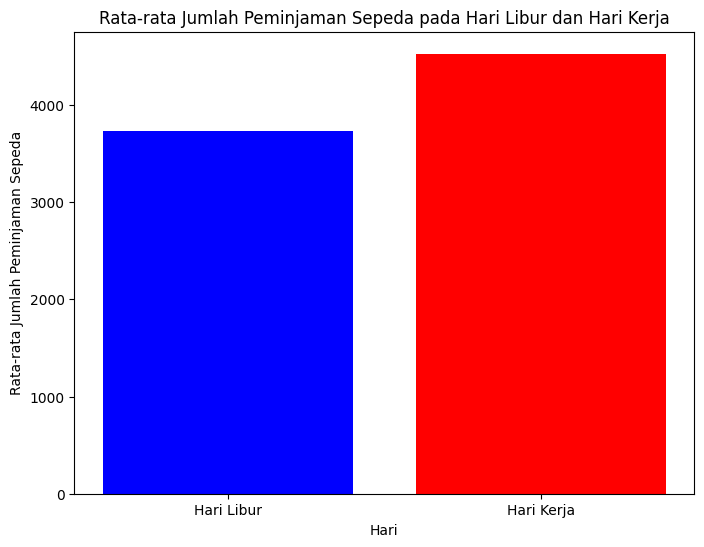


HASIL UJI HIPOTESIS
Nilai t-statistic: -1.8497137724448645
Nilai p-value: 0.0
Terdapat perbedaan yang signifikan dalam pola peminjaman sepeda antara hari libur dan hari kerja.


In [401]:
# Hitung rata-rata jumlah peminjaman sepeda pada hari libur dan hari kerja
rata2_peminjaman_hari_libur = hari_libur.mean()
rata2_peminjaman_hari_kerja = hari_kerja.mean()

# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(['Hari Libur', 'Hari Kerja'], [rata2_peminjaman_hari_libur, rata2_peminjaman_hari_kerja], color=['blue', 'red'])

# Tambahkan judul dan label sumbu
plt.title('Rata-rata Jumlah Peminjaman Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')

# Tampilkan diagram batang
plt.show()

# Interpretasi hasil uji
print("\nHASIL UJI HIPOTESIS")
# Tampilkan hasil uji
print("Nilai t-statistic:", t_statistic)
print("Nilai p-value:", p_value)
if p_value < alpha1:
    print("Terdapat perbedaan yang signifikan dalam pola peminjaman sepeda antara hari libur dan hari kerja.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam pola peminjaman sepeda antara hari libur dan hari kerja.")



### Pertanyaan 5 :
Apakah ada perbedaan jumlah peminjaman sepeda berdasarkan musim?


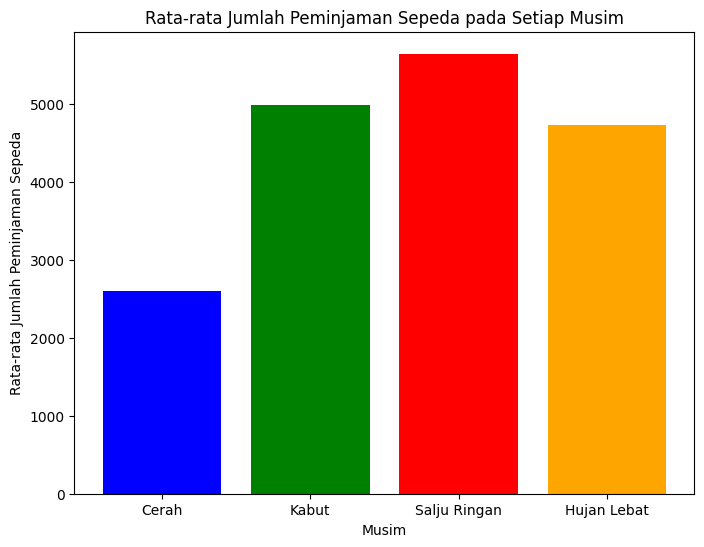


HASIL UJI HIPOTESIS
Nilai F-statistic: 759.0862809702604
Nilai p-value: 0.0
Terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda antara musim tertentu.


In [402]:
# Buat visualisasi dalam bentuk barchart
plt.figure(figsize=(8, 6))
plt.bar(['Cerah', 'Kabut', 'Salju Ringan', 'Hujan Lebat'], [musim_1.mean(), musim_2.mean(), musim_3.mean(), musim_4.mean()], color=['blue', 'green', 'red', 'orange'])
plt.title('Rata-rata Jumlah Peminjaman Sepeda pada Setiap Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.show()


# Interpretasi hasil uji
print("\nHASIL UJI HIPOTESIS")
# Tampilkan hasil uji
print("Nilai F-statistic:", f_statistic)
print("Nilai p-value:", p_value)
if p_value < alpha2:
    print("Terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda antara musim tertentu.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda antara musim tertentu.")


## Conclusion

- Conclution pertanyaan 1                                                                          
Berdasarkan hasil diatas dapat diketahu bahwasanya jumlah peminjam sepeda tahun 2011 adalah sebanyak 1243103 orang.

- Conclution pertanyaan 2                                                                          
Berdasarkan hasil diatas dapat diketahu bahwasanya jumlah peminjam sepeda tahun 2012 adalah sebanyak 2049576 orang.

- Conclution pertanyaan 3                                                                          
Berdasarkan hasil diatas dapat diketahu bahwasanya total pengguna casual dan registered tahun 2011 dan 2012 adalah Casual tahun 2011 sebanyak 247252 jiwa, Casual tahun 2012 sebanyak 372765 jiwa, registered tahun 2011 sebanyak 995851 jiwa, dan registered tahun 2012 sebanyak 1676811 jiwa.

- Conclution pertanyaan 4                                                                          
Berdasarkan hasil analsis yang dilakukan didapatkan hasil uji hipotesis yaitu terdapat perbedaan pola peminjama sepeda antara hari libur dan hari kerja. kemudian dapat dilihat juga pada barchart yang dihasilkan bahwasanya peminjaman sepeda di hari kerja lebih banyak di bandingkan dengan peminjaman sepeda di hari libur.

- Conclution pertanyaan 5                                                                          
Berdasarkan hasil analisis yang dilakukan didapatkan hasil uji hipotesis yaitu terdapat perbedaan pola peminjaman sepeta antara setiap musimnya. Dimana dapat
diketahui dari barchart yang di tampilkan bahwasanya peminjaman sepeda ketika cuaca salju ringan lebih banyak dibandingkan dengan peminjaman sepeda pada cuaca lainnya..